# Modelo de Clasificación KNN

##Fundamentos de la técnica
 Es un algoritmo de aprendizaje automático supervisado que se utiliza generalmente para clasificación, aunque también puede emplearse para regresión.
 Funciona encontrando los «k» puntos de datos (vecinos) más cercanos a una entrada dada y realiza predicciones basadas en la clase mayoritaria (para clasificación).
 Se conoce como algoritmo de aprendizaje perezoso porque no aprende inmediatamente del conjunto de entrenamiento, sino que almacena todo el conjunto de datos y realiza los cálculos solo en el momento de la clasificación.

#Modelo matemático

## 1. Representación de los datos

Dado un conjunto de datos:

$$
D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}
$$

donde:  
- $x_i \in \mathbb{R}^m$ es el conjunto de características (por ejemplo, peso, altura, color).
- $y_i$ es la clase para $x_i$.


## 2. Distancia entre puntos

Para conocer la clase de un nuevo dato $x_q$ (query), se calcula la distancia entre $x_q$ y cada punto (dato) $x_i$.

La distancia más común es la **euclidiana**:

$$
d(x_q, x_i) = \sqrt{\sum_{j=1}^{m} (x_{qj} - x_{ij})^2}
$$

Y es la misma que vamos a emplear para explicar este modelo.



## 3. K vecinos más cercanos

Una vez que ya tenemos todas las distancias, las ordenamos de menor a mayor y se seleccionamos los **k vecinos más cercanos**:

$$
N_k(x_q) = \{ x_{(1)}, x_{(2)}, \ldots, x_{(k)} \}
$$



## 4. Decisión

Para nuestro modelo de clasificación el valor se determina por **votación mayoritaria** (la clase más común) entre las clases de los vecinos.

Ejemplo: Si entre los 5 vecinos más cercanos hay 3 manzanas y 2 plátanos, entonces el nuevo punto se clasifica como “manzana”

Matemáticamente:

$\hat{y} =$ clase más frecuente entre los vecinos





In [39]:
#LIBRERIAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Preprocesamiento

In [40]:
#LECTURA DEL DF Y ELIMINACION DE COLUMNAS
df = pd.read_csv(r"/content/fruit_classification.csv")
df = df.drop(columns=["taste"])
df.head(10)


,size (cm),shape,weight (g),avg_price (₹),color,fruit_name
0,10.2,long,131.5,37.8,yellow,banana
1,5.4,round,136.0,80.2,red,apple
2,9.8,long,118.1,37.1,yellow,banana
3,9.0,long,126.0,37.6,yellow,banana
4,9.3,long,117.3,36.5,yellow,banana
5,6.2,round,147.6,83.4,red,apple
6,5.9,round,149.9,73.8,red,apple
7,3.1,oval,19.7,64.7,red,strawberry
8,5.8,round,138.0,86.1,red,apple
9,10.4,long,120.8,41.7,yellow,banana


In [41]:
#NORMALIZACION DE VARIABLES CON Z-SCORE
shape = LabelEncoder()
color = LabelEncoder()
df['shape'] = shape.fit_transform(df['shape'])
df['color'] = color.fit_transform(df['color'])


scaler = StandardScaler()

cols_to_scale = ["size (cm)", "weight (g)", "avg_price (₹)","shape","color"]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head(10)


,size (cm),shape,weight (g),avg_price (₹),color,fruit_name
0,1.288505,-1.191928,0.582248,-1.303795,1.361099,banana
1,-0.377598,1.208692,0.664495,1.200841,-0.734701,apple
2,1.149663,-1.191928,0.337336,-1.345145,1.361099,banana
3,0.871979,-1.191928,0.481724,-1.315609,1.361099,banana
4,0.976111,-1.191928,0.322714,-1.380588,1.361099,banana
5,-0.099914,1.208692,0.876509,1.389870,-0.734701,apple
6,-0.204045,1.208692,0.918546,0.822782,-0.734701,apple
7,-1.175938,0.008382,-1.461128,0.285231,-0.734701,strawberry
8,-0.238756,1.208692,0.701049,1.549363,-0.734701,apple
9,1.357926,-1.191928,0.386684,-1.073416,1.361099,banana


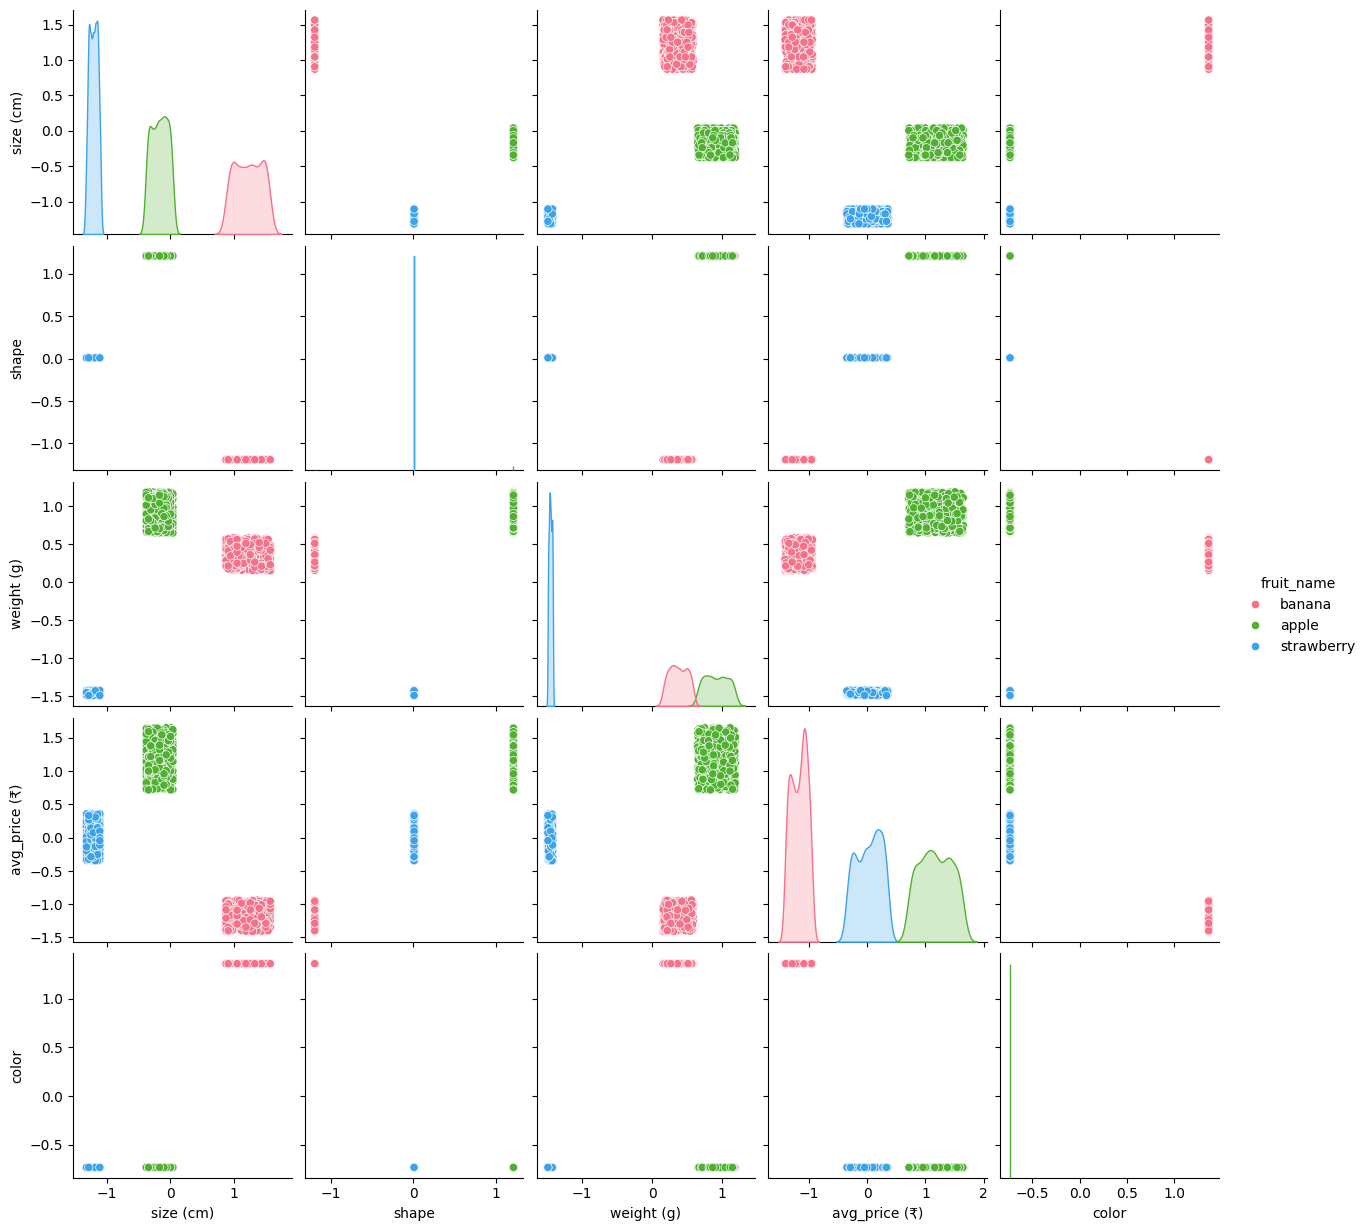

In [42]:
#DISPERSION DE LAS VARIABLES
sns.pairplot(df, hue='fruit_name', diag_kind='kde', palette='husl')

#Feature Engineering

Como pudimos observar en el gráfico de dispersión las mejores variables para poder clasificar de manera más eficiente son tamaño, peso y el precio de la fruta ya que los datos en estas intersecciones estan muy dispersos, por lo tanto no hay mucha similitud entre estos y los podemos usar para clasificar de manera más eficiente.

#Prediction

In [43]:
x = df[["size (cm)", "weight (g)", "avg_price (₹)"]]
y = df["fruit_name"]


In [44]:
#DIVISION DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
#ENTRENAMIENTO Y CREACION
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [46]:
#PROBANDO QUE FUNCIONA
def predict_fruit(size, weight, avg_price):
    new_data = np.array([[size, weight, avg_price]])
    pred = knn.predict(new_data)
    print(f" La fruta predicha es: {pred[0]}")


In [47]:
predict_fruit(0.25, -0.45, 0.12)


 La fruta predicha es: apple


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#Model Evaluation

Precisión del modelo: 100.00%

Reporte de clasificación:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00       140
      banana       1.00      1.00      1.00       156
  strawberry       1.00      1.00      1.00       134

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430



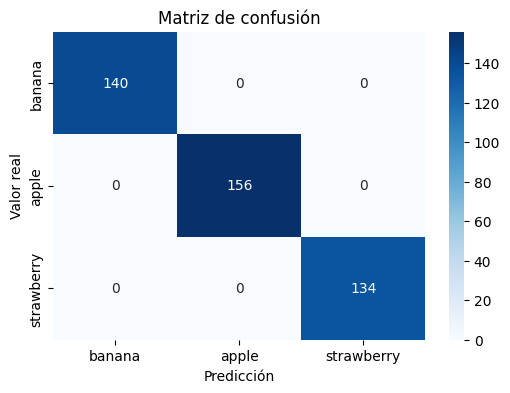

In [48]:
#EVALUACION
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo: {acc*100:.2f}%\n")

print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()
